#Importing libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Importing the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

#Data Cleaning


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications           

In [6]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']
df.drop(features_drop_list, axis=1, inplace=True)

In [7]:
df.loc[df['diag_1'].str.contains('V', na=False, case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E', na=False, case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V', na=False, case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E', na=False, case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V', na=False, case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E', na=False, case=False), 'diag_3'] = 0

df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col].loc[(df[col] >= 1) & (df[col] < 140)] = 1
    df[col].loc[(df[col] >= 140) & (df[col] < 240)] = 2
    df[col].loc[(df[col] >= 240) & (df[col] < 280)] = 3
    df[col].loc[(df[col] >= 280) & (df[col] < 290)] = 4
    df[col].loc[(df[col] >= 290) & (df[col] < 320)] = 5
    df[col].loc[(df[col] >= 320) & (df[col] < 390)] = 6
    df[col].loc[(df[col] >= 390) & (df[col] < 460)] = 7
    df[col].loc[(df[col] >= 460) & (df[col] < 520)] = 8
    df[col].loc[(df[col] >= 520) & (df[col] < 580)] = 9
    df[col].loc[(df[col] >= 580) & (df[col] < 630)] = 10
    df[col].loc[(df[col] >= 630) & (df[col] < 680)] = 11
    df[col].loc[(df[col] >= 680) & (df[col] < 710)] = 12
    df[col].loc[(df[col] >= 710) & (df[col] < 740)] = 13
    df[col].loc[(df[col] >= 740) & (df[col] < 760)] = 14
    df[col].loc[(df[col] >= 760) & (df[col] < 780)] = 15
    df[col].loc[(df[col] >= 780) & (df[col] < 800)] = 16
    df[col].loc[(df[col] >= 800) & (df[col] < 1000)] = 17
    df[col].loc[(df[col] == -1)] = 0

<ipython-input-7-f7c08a3e9f44>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[(df[col] >= 1) & (df[col] < 140)] = 1
<ipython-input-7-f7c08a3e9f44>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [8]:
df['race'] = df['race'].replace('?', 'Other')
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

<ipython-input-8-b5b1fa231d0c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)


In [9]:
for i in range(0, 10):
    df['age'] = df['age'].replace('[' + str(10 * i) + '-' + str(10 * (i + 1)) + ')', i * 10 + 5)

<ipython-input-9-6a586257728e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('[' + str(10 * i) + '-' + str(10 * (i + 1)) + ')', i * 10 + 5)


In [10]:
df['max_glu_serum'] = df['max_glu_serum'].replace({"None": 0, "Norm": 1, ">200": 2, ">300": 3})
df['A1Cresult'] = df['A1Cresult'].replace({"None": 0, "Norm": 1, ">7": 2, ">8": 3})

drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    df[i] = df[i].replace({'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3})

df['change'] = df['change'].replace({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].replace({'Yes': 1, 'No': 0})
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 2})

<ipython-input-10-314c3ec741e0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace({"None": 0, "Norm": 1, ">200": 2, ">300": 3})
<ipython-input-10-314c3ec741e0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace({"None": 0, "Norm": 1, ">7": 2, ">8": 3})
<ipython-input-10-314c3ec741e0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

#Feature creation


In [11]:
df = pd.concat([df, pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'], axis=1)
df['med_change_interaction'] = df['num_medications'] * df['change'] * df['diabetesMed']

#Training the model


In [12]:
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient', 'number_emergency',
                      'number_inpatient', 'number_diagnoses']

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train[numerical_features])
X_val_poly = poly.transform(X_val[numerical_features])
X_test_poly = poly.transform(X_test[numerical_features])

poly_feature_names = poly.get_feature_names_out(numerical_features)

X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly_feature_names, index=X_val.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)

X_train = pd.concat([X_train.drop(numerical_features, axis=1), X_train_poly_df], axis=1)
X_val = pd.concat([X_val.drop(numerical_features, axis=1), X_val_poly_df], axis=1)
X_test = pd.concat([X_test.drop(numerical_features, axis=1), X_test_poly_df], axis=1)

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Convert back to df
X_train = pd.DataFrame(X_train, columns=X_train_poly_df.columns.union(X.drop(numerical_features, axis=1).columns))
X_val = pd.DataFrame(X_val,  columns=X_val_poly_df.columns.union(X.drop(numerical_features, axis=1).columns))
X_test = pd.DataFrame(X_test,  columns=X_test_poly_df.columns.union(X.drop(numerical_features, axis=1).columns))


sc_X = StandardScaler()
Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.transform(X_val)
Xsc_test = sc_X.transform(X_test)

nbm = GaussianNB()
nbm.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(Xsc_train, y_train)

svm = SVC()
svm.fit(Xsc_train, y_train)

rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)

RandomForestClassifier()

# Model Selection



Initial Gradient Boost Performance:
F1 Score (micro):  0.6236017897091722
Confusion Matrix:
 [[6142  400    1]
 [2797  542    4]
 [ 697  139    6]]

Best parameters: {'max_depth': 9, 'max_features': 0.7, 'min_samples_leaf': 70, 'min_samples_split': 800, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score (micro): 0.6164755534146001

Tuned Gradient Boost Performance:
F1 Score (micro):  0.6253728560775541
Confusion Matrix:
 [[5989  543   11]
 [2629  710    4]
 [ 662  170   10]]

Gradient Boost (LR=0.05, N=200) Performance:
F1 Score (micro):  0.6239746457867263
Confusion Matrix:
 [[5997  536   10]
 [2645  690    8]
 [ 673  162    7]]

Gradient Boost (LR=0.01, N=1000) Performance:
F1 Score (micro):  0.6230425055928411
Confusion Matrix:
 [[5993  541    9]
 [2654  682    7]
 [ 680  153    9]]

Gradient Boost (LR=0.005, N=2000) Performance:
F1 Score (micro):  0.6246271439224459
Confusion Matrix:
 [[6000  532   11]
 [2648  690    5]
 [ 672  159   11]]

Final Model Performance (Test Set):
F1 

<Axes: title={'center': 'Feature Importances - GBM Final Model'}>

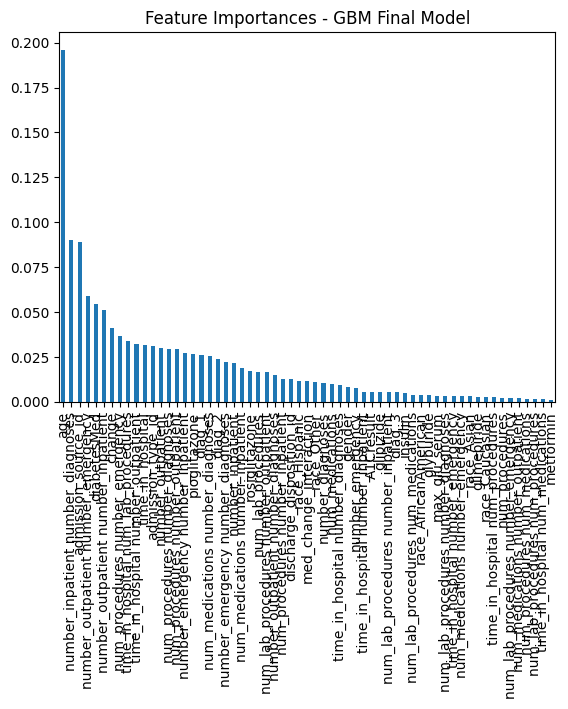

In [13]:
gbm0 = GradientBoostingClassifier(random_state=42)
gbm0.fit(X_train, y_train)
gbm0_pred = gbm0.predict(X_val)
print('\nInitial Gradient Boost Performance:')
print('F1 Score (micro): ', f1_score(y_val, gbm0_pred, average='micro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, gbm0_pred))
feat_imp = pd.Series(gbm0.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances - Initial GBM')




param_grid = {
    'n_estimators': [70, 100],
    'max_depth': [9, 12],
    'min_samples_split': [800],
    'min_samples_leaf': [70],
    'max_features': [0.7],
    'subsample': [0.8],
}

gsearch = GridSearchCV(
    estimator=GradientBoostingClassifier(learning_rate=0.1, random_state=42),
    param_grid=param_grid,
    scoring='f1_micro',
    n_jobs=-1,
    cv=5,
    verbose=0
)
gsearch.fit(X_train, y_train)

print("\nBest parameters:", gsearch.best_params_)
print("Best F1 Score (micro):", gsearch.best_score_)

best_gbm = gsearch.best_estimator_
best_gbm_pred = best_gbm.predict(X_val)
print('\nTuned Gradient Boost Performance:')
print('F1 Score (micro): ', f1_score(y_val, best_gbm_pred, average='micro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, best_gbm_pred))
feat_imp = pd.Series(best_gbm.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances - Tuned GBM')




learning_rates = [0.05, 0.01, 0.005]
for lr in learning_rates:
    n_est = int(best_gbm.n_estimators * (0.1 / lr))
    params = best_gbm.get_params().copy()
    params['learning_rate'] = lr
    params['n_estimators'] = n_est
    gbm_adjusted = GradientBoostingClassifier(**params)
    gbm_adjusted.fit(X_train, y_train)
    gbm_adjusted_pred = gbm_adjusted.predict(X_val)
    print(f'\nGradient Boost (LR={lr}, N={n_est}) Performance:')
    print('F1 Score (micro): ', f1_score(y_val, gbm_adjusted_pred, average='micro'))
    print('Confusion Matrix:\n', confusion_matrix(y_val, gbm_adjusted_pred))
    feat_imp = pd.Series(gbm_adjusted.feature_importances_, X_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title=f'Feature Importances - GBM LR={lr}')



final_model = best_gbm

final_model_pred = final_model.predict(X_test)
print('\nFinal Model Performance (Test Set):')
print('F1 Score (micro): ', f1_score(y_test, final_model_pred, average='micro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, final_model_pred))
feat_imp = pd.Series(final_model.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title=f'Feature Importances - GBM Final Model')

#Saving the model

In [14]:
import joblib
import os
from google.colab import files

model_filename = 'final_gradient_boosting_model.pkl'

joblib.dump(final_model, model_filename)

if os.path.exists(model_filename):
    print("Model saved successfully")
else:
    print("!!! Model not founf.")

files.download(model_filename)

Model saved successfully


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>